## Exercício 1 - Gaussiana no Espaço R²
### Aluno: Gustavo Barros Campos
### Matrícula: 2015079160



# 1. Gerar os dados conforme Fig0.1.

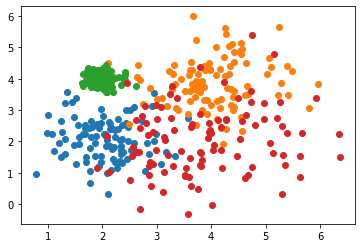

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go 
from plotly.subplots import make_subplots


x_c1 = (np.random.normal(2,.6,200)).reshape(-1,2)

x_c2 = (np.random.normal(4,.8,200)).reshape(-1,2)

x_c3 = (np.zeros(200)).reshape(-1,2)
x_c3[:,0]=(np.random.normal(2,.2,100))
x_c3[:,1]=(np.random.normal(4,.2,100))

x_c4 = (np.zeros(200)).reshape(-1,2)
x_c4[:,0]=(np.random.normal(4,1,100))
x_c4[:,1]=(np.random.normal(2,1,100))


plt.scatter(x_c1[:,0],x_c1[:,1])
plt.scatter(x_c2[:,0],x_c2[:,1])
plt.scatter(x_c3[:,0],x_c3[:,1])
plt.scatter(x_c4[:,0],x_c4[:,1])

# 2. Estimar a densidade para as duas classes e apresentar o gráfico da densidade de probabilidade para as duas distribuições considerando coeficiente de correlação nulo.

In [5]:
def pdf2var(x,y,u1,u2,s1,s2,p): 
    return (1/(2*np.pi*s1*s2*np.sqrt(1-p**2)))*np.exp((-1/(2*(1-p**2)))*( ((x-u1)**2)/(s1**2) + ((y-u2)**2)/(s2**2) - ((2*p*(x-u1)*(y-u2))/(s1*s2)) ))

In [6]:
u1 = (np.mean(x_c1[:,0]),np.mean(x_c1[:,1]))
u2 = (np.mean(x_c2[:,0]),np.mean(x_c2[:,1]))
u3 = (np.mean(x_c3[:,0]),np.mean(x_c3[:,1]))
u4 = (np.mean(x_c4[:,0]),np.mean(x_c4[:,1]))

s1 = (np.std(x_c1[:,0]),np.std(x_c1[:,1]))
s2 = (np.std(x_c2[:,0]),np.std(x_c2[:,1]))
s3 = (np.std(x_c3[:,0]),np.std(x_c3[:,1]))
s4 = (np.std(x_c4[:,0]),np.std(x_c4[:,1]))

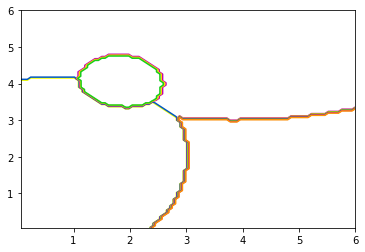

In [13]:
x = np.linspace(0.06,6,100)
y = np.linspace(0.06,6,100)
xx, yy = np.meshgrid(x, y)

z1 = pdf2var(xx,yy,u1[0],u1[1],s1[0],s1[1],0)
z2 = pdf2var(xx,yy,u2[0],u2[1],s2[0],s2[1],0)
z3 = pdf2var(xx,yy,u3[0],u3[1],s3[0],s3[1],0)
z4 = pdf2var(xx,yy,u4[0],u4[1],s4[0],s4[1],0)

M = np.zeros(10000).reshape(xx.shape)

for i in range(100):
    for j in range(100):
        lista  = np.array([z1[i][j],z2[i][j],z3[i][j],z4[i][j]])
        max = lista.max()
        if (max == z1[i][j]):
            M[i][j] = 1
        if (max == z2[i][j]):
            M[i][j] = 2
        if (max == z3[i][j]):
            M[i][j] = 3
        if (max == z4[i][j]):
            M[i][j] = 4

plt.contour(xx, yy, M,cmap='prism')
#plt.scatter(x_c1[:,0],x_c1[:,1])
#plt.scatter(x_c2[:,0],x_c2[:,1])
#plt.scatter(x_c3[:,0],x_c3[:,1])
#plt.scatter(x_c4[:,0],x_c4[:,1])

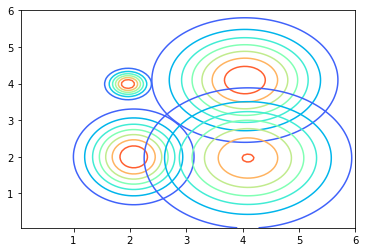

In [9]:
plt.contour(xx, yy, z1,cmap='rainbow')
plt.contour(xx, yy, z2,cmap='rainbow')
plt.contour(xx, yy, z3,cmap='rainbow')
plt.contour(xx, yy, z4,cmap='rainbow')
fig = go.Figure(data=[go.Surface(z=z1, x=xx, y=yy), go.Surface(z=z2, x=xx, y=yy, showscale=False), go.Surface(z=z3, x=xx, y=yy, showscale=False), go.Surface(z=z4, x=xx, y=yy, showscale=False)],)
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=6, range=[0,6],),
                     yaxis = dict(nticks=6, range=[0,6],),
                     zaxis = dict(nticks=10, range=[0,1.400],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()